In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import Normalize 
import pandas as pd
import glob
import os
import re
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import csv
import math
import copy
from scipy.optimize import curve_fit
import scipy.stats as st
import sys
from tqdm import tqdm
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ptick

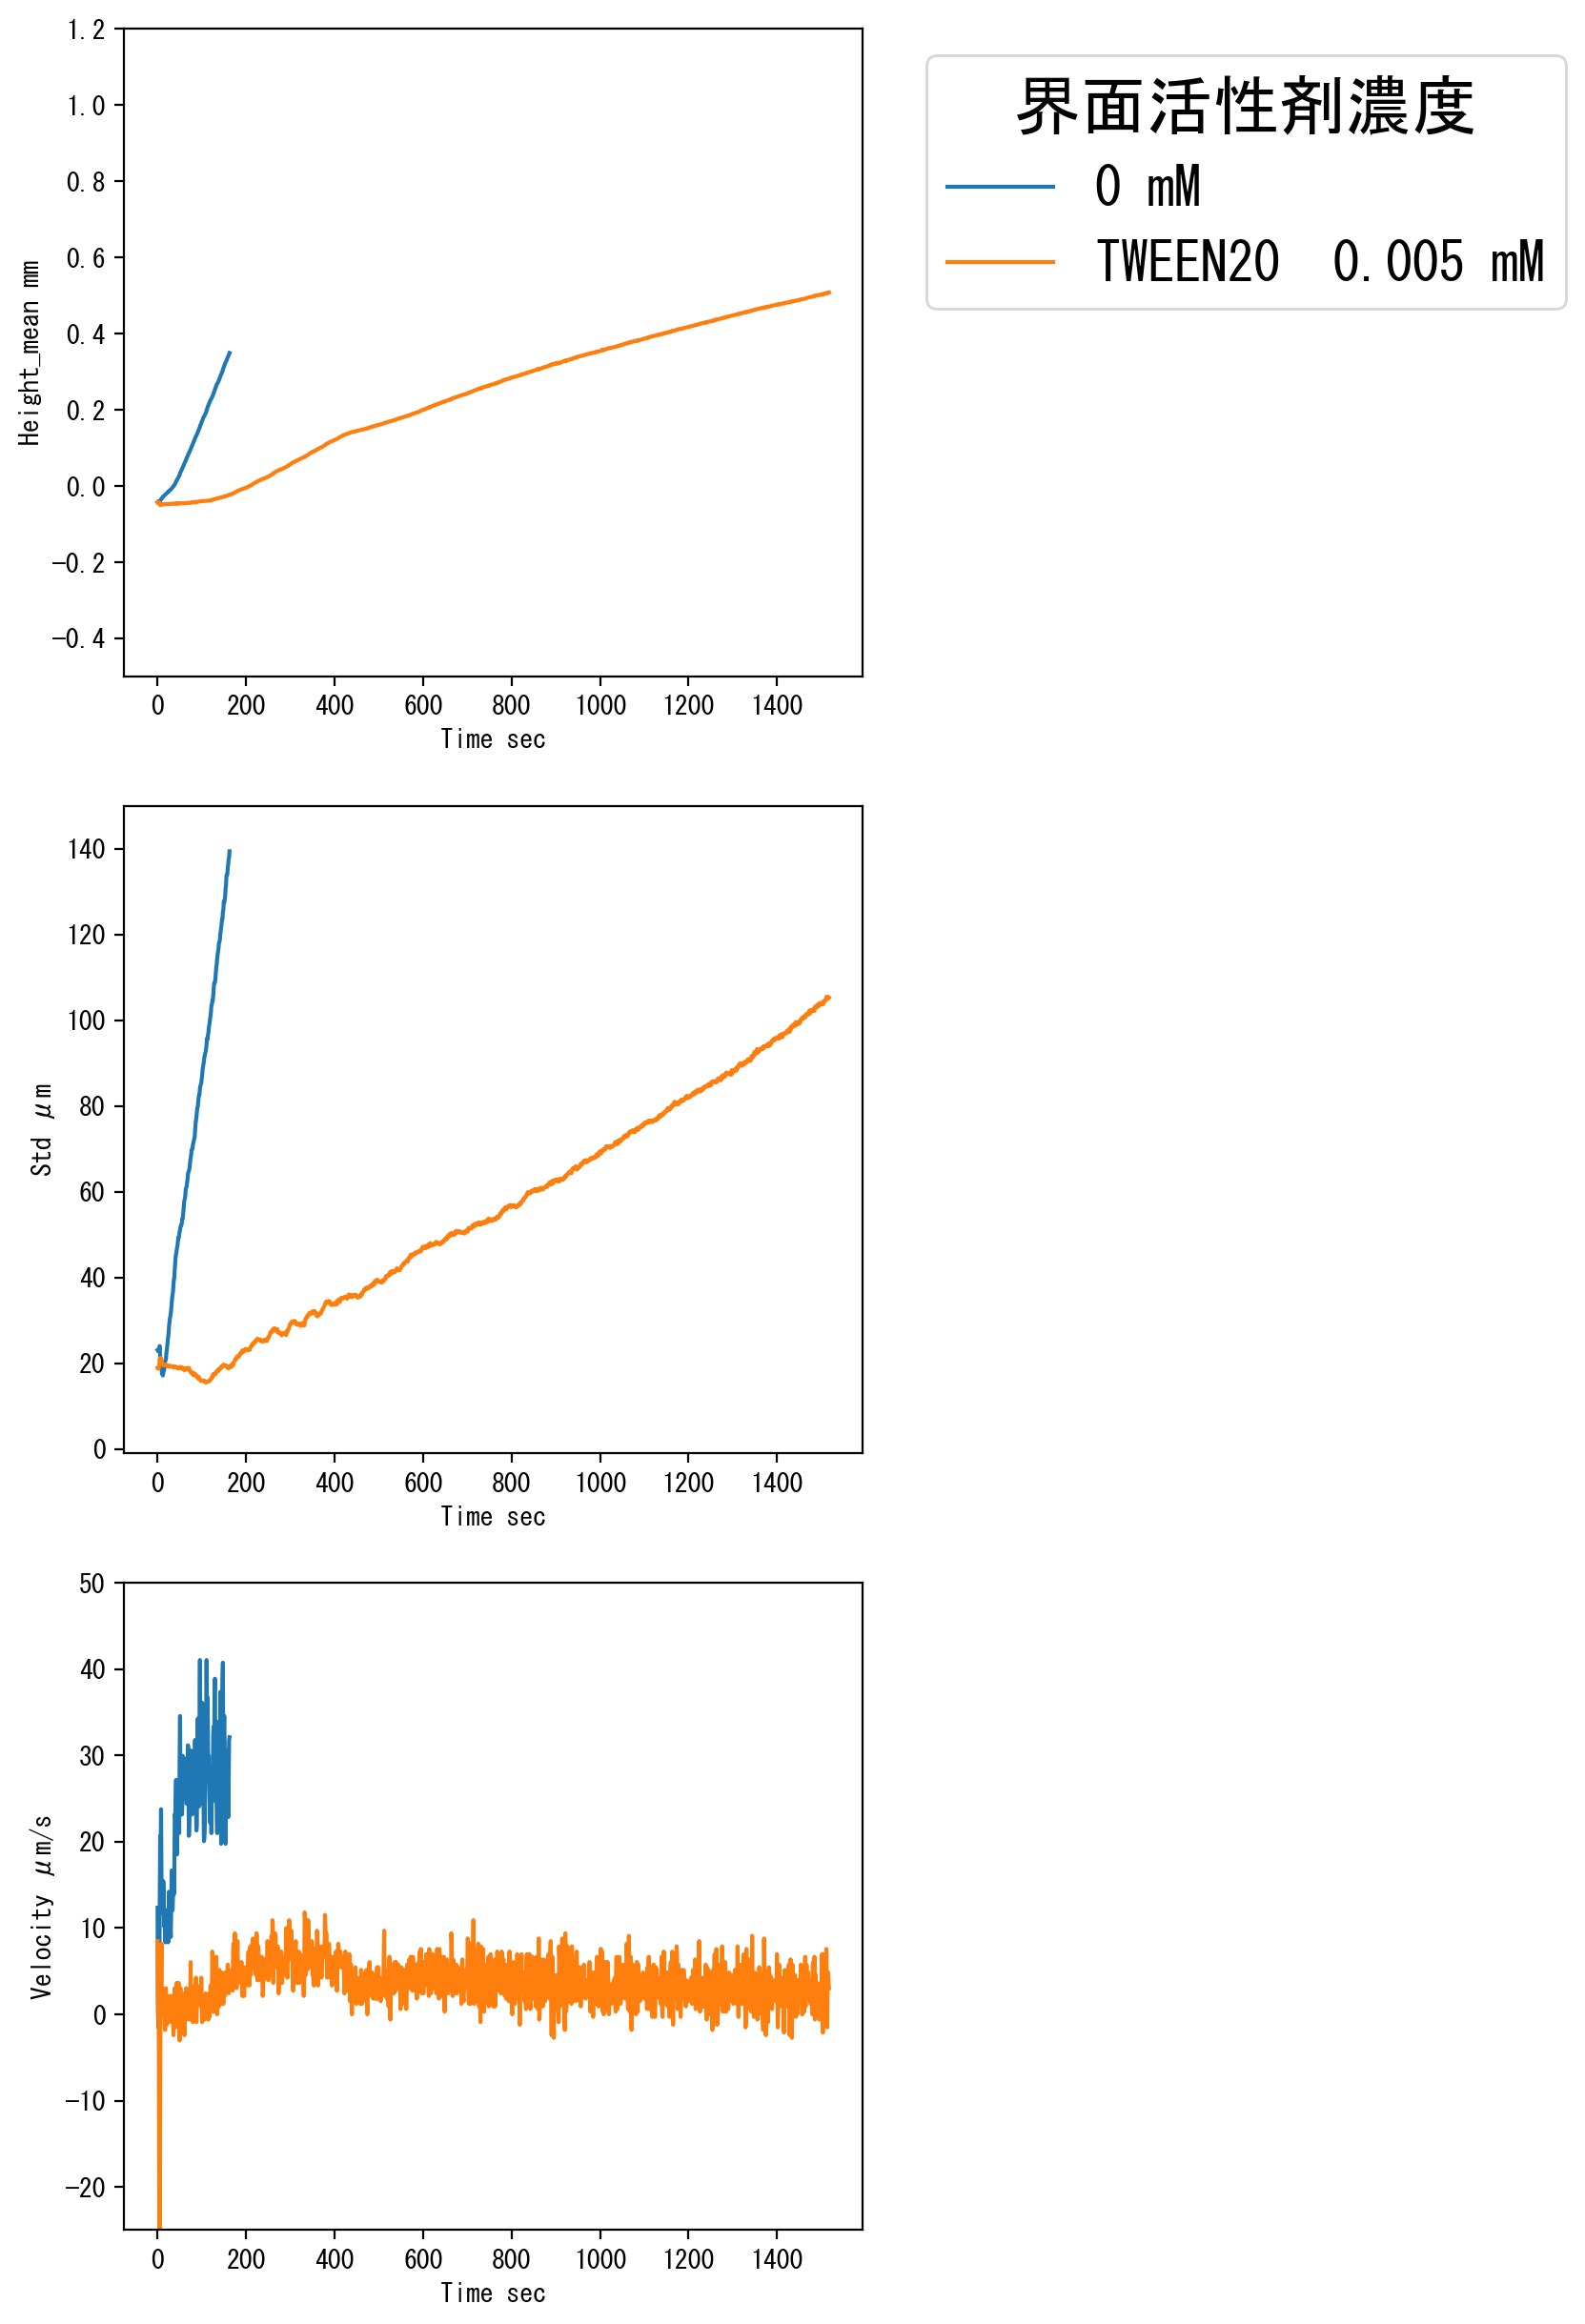

In [ ]:
data_path1="D:/master_thesis_data/experment_data/movie_data/movie_data/data_for_test/surface_growth/20241105/20241105_NOTWEEN_0.00mM_5V_02/20241105_NOTWEEN_0.00mM_5V_02_polar_data.csv"
data_path2="D:/master_thesis_data/experment_data/movie_data/movie_data/data_for_test/surface_growth/20241105/20241105_TWEEN20_0.005mM_5V_01/20241105_TWEEN20_0.005mM_5V_01_polar_data.csv"
data_list=[data_path1,data_path2]
data_kind_list=["Height_mean mm","Std μm","Velocity μm/s"]
label_list=["0 mM","TWEEN20  0.005 mM"]
fig ,ax=plt.subplots(3,1,figsize=(5,15),dpi=200)
for i,data_path in enumerate(data_list):
    data=pd.read_csv(data_path)
    time=data["Time"]
    hight=data["Height_mean (cm)"]*1e1#cm→mm
    std=data["Height_Std (cm)"]*1e4#cm→μm
    v=np.gradient(hight,time)*1e4#cm→μm

    plt.rcParams['font.family'] = "MS Gothic"
    #plot
    ax[0].plot(time,hight)
    ax[1].plot(time,std)
    ax[2].plot(time,v)

    ax[0].set_ylim(-0.5,1.2)
    ax[1].set_ylim(-1,150)
    ax[2].set_ylim(-25,50)
    
    for j in range(3):
        ax[j].set_xlabel("Time sec")
        ax[j].set_ylabel(data_kind_list[j])
        # ax[j].set_xlim(0,500)
    ax[0].legend(label_list, loc='upper left', bbox_to_anchor=(1.05, 1),title="界面活性剤濃度",fontsize=20,title_fontsize=25)
plt.show()


1.25


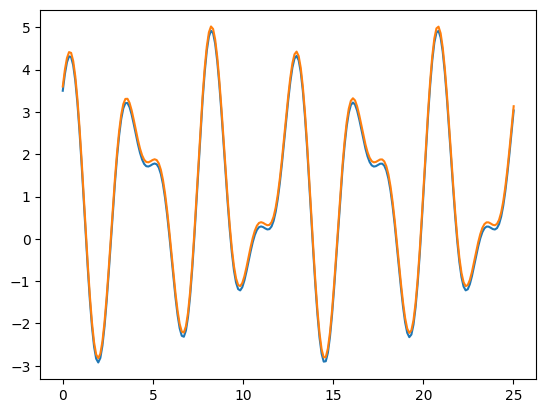

[-27.   -26.75 -26.5  -26.25 -26.   -25.75 -25.5  -25.25 -25.   -24.75
 -24.5  -24.25 -24.   -23.75 -23.5  -23.25 -23.   -22.75 -22.5  -22.25
 -22.   -21.75 -21.5  -21.25 -21.   -20.75 -20.5  -20.25 -20.   -19.75
 -19.5  -19.25 -19.   -18.75 -18.5  -18.25 -18.   -17.75 -17.5  -17.25
 -17.   -16.75 -16.5  -16.25 -16.   -15.75 -15.5  -15.25 -15.   -14.75
 -14.5  -14.25 -14.   -13.75 -13.5  -13.25 -13.   -12.75 -12.5  -12.25
 -12.   -11.75 -11.5  -11.25 -11.   -10.75 -10.5  -10.25 -10.    -9.75
  -9.5   -9.25  -9.    -8.75  -8.5   -8.25  -8.    -7.75  -7.5   -7.25
  -7.    -6.75  -6.5   -6.25  -6.    -5.75  -5.5   -5.25  -5.    -4.75
  -4.5   -4.25  -4.    -3.75  -3.5   -3.25  -3.    -2.75  -2.5   -2.25
  -2.    -1.75  -1.5   -1.25  -1.    -0.75  -0.5   -0.25   0.     0.25
   0.5    0.75   1.     1.25   1.5    1.75   2.     2.25   2.5    2.75
   3.     3.25   3.5    3.75   4.     4.25   4.5    4.75   5.     5.25
   5.5    5.75   6.     6.25   6.5    6.75   7.     7.25   7.5    7.75
   8. 

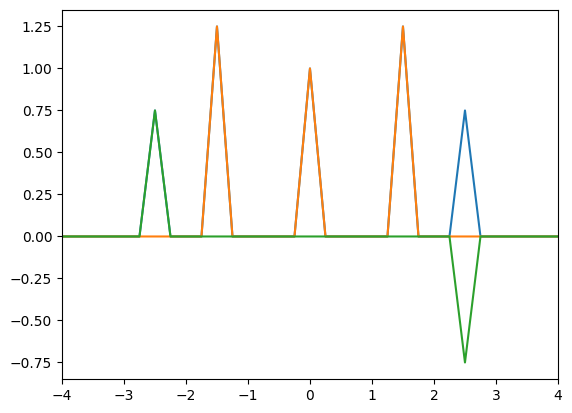

In [3]:
### 量子化(離散化) ###
N = 217# サンプル数 [個]
L = 8 * np.pi
dx = L / N # サンプリング間隔 [m]

### 入力信号 y(t) ###
X = np.linspace(0, L, N, endpoint=False) # 0からLまでのN個の等間隔な数列
# X= np.linspace(-L/2, L/2, N, endpoint=False)
# y = 1 * np.sin(X) - 3 * np.cos(3* X) + 2 * np.sin(2 * X)
# Y=2.5*np.sin(1.5*X)
Y=1.5*np.sin(2.5*X)+2.5*np.cos(1.5*X)+1
# Y=np.exp(-(X-L/2)**2/2)/np.sqrt(2*np.pi)
# Y=3*np.exp(-X)
# Y=np.random.rand(N)
#a_0の定義はどうなっているかをカクニン
y_tilde = np.fft.fft(Y) / N

shifted_y_tilde = np.fft.fftshift(y_tilde)
index=np.where(abs(shifted_y_tilde)==max(abs(shifted_y_tilde)))
print(max(abs(shifted_y_tilde)))

y_decoded = np.fft.ifft(y_tilde)*N
plt.plot(X, Y) # y-t グラフのプロット
plt.plot(X, np.real(y_decoded) + 0.1)
# plt.xlim(-10,10) 
plt.show()

k= np.fft.fftfreq(N,d=dx) *2*np.pi

shifted_k= np.fft.fftshift(k)
print(shifted_k)
lambda_ = 2*np.pi / shifted_k[index]
print(lambda_)
print(shifted_k[index])
# plot
plt.plot(shifted_k, np.abs(shifted_y_tilde))
plt.plot(shifted_k, np.real(shifted_y_tilde))
plt.plot(shifted_k, np.imag(shifted_y_tilde))
k_max = N/2 * (2*np.pi / L)
plt.xlim(-4, 4)
plt.show()

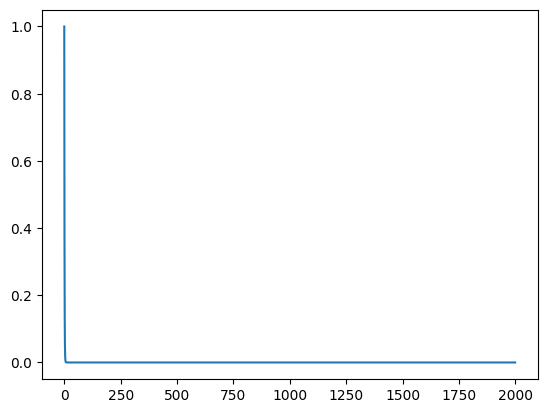

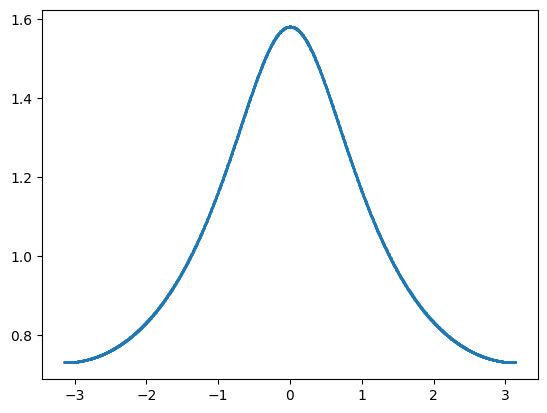

In [125]:
#sampling rate
N=2000

X=np.linspace(0,N,N,endpoint=False)
# Y=1.5*np.sin(2.5*X)+2.5*np.cos(1.5*X)
# Y=np.exp(-(X-N/2)**2/(2*16**2))/(np.sqrt(2*np.pi)*16)
Y=np.exp(-X)

#plot
plt.plot(X,Y)
plt.show()

#FFT
y_fft=np.fft.fft(Y)
freq=np.fft.fftfreq(N)*2*np.pi
plt.scatter(freq,np.abs(y_fft),s=1)
# plt.xlim(-0.1,0.1)
# # plt.scatter(freq,np.abs(y_fft),s=1)
# # y_fft=np.fft.fft(Y)/(N/2)
# # shifted_y_fft=np.fft.fftshift(y_fft)

# #Inverse FFT
# # y_fft_inv=np.fft.ifft(y_fft)*(N/2)

# #plot
# # plt.plot(X,np.real(y_fft_inv)+0.1)
# plt.show()

# #plot
# k=np.fft.fftfreq(N,d=dx)*2*np.pi
# k_shifted=np.fft.fftshift(k)

# plt.plot(k_shifted,np.abs(shifted_y_fft))
# plt.plot(k_shifted,np.real(shifted_y_fft))
# plt.plot(k_shifted,np.imag(shifted_y_fft))
# plt.xlim(-4,4)
# plt.show()